In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('swiggy.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [4]:
print(df.head())

    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3 

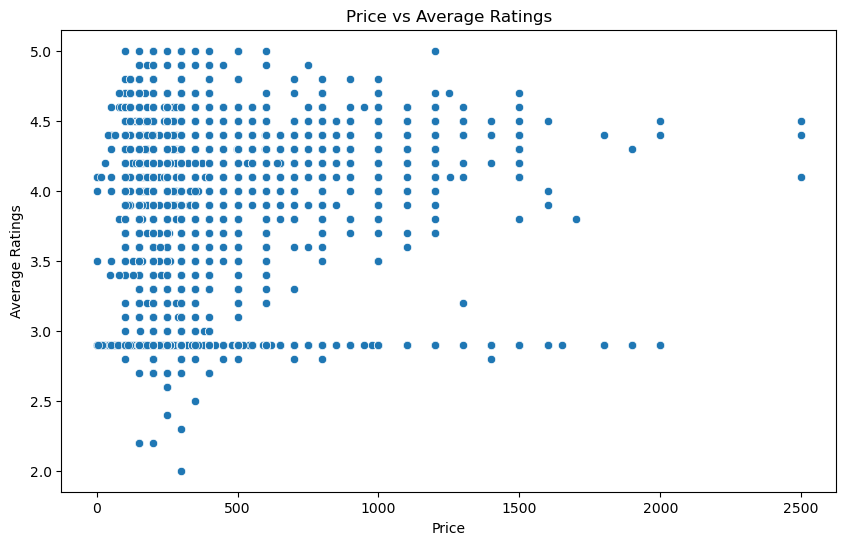

In [6]:
#ratings by type of food
#ratings based on price&delivery time


#price vs avg rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Avg ratings', data=df)
plt.title('Price vs Average Ratings')
plt.xlabel('Price')
plt.ylabel('Average Ratings')
plt.show()

In [7]:
correlation = df['Price'].corr(df['Avg ratings'])
print(correlation)

0.11363038630435689


In [ ]:
# No correlation between price and avg rating

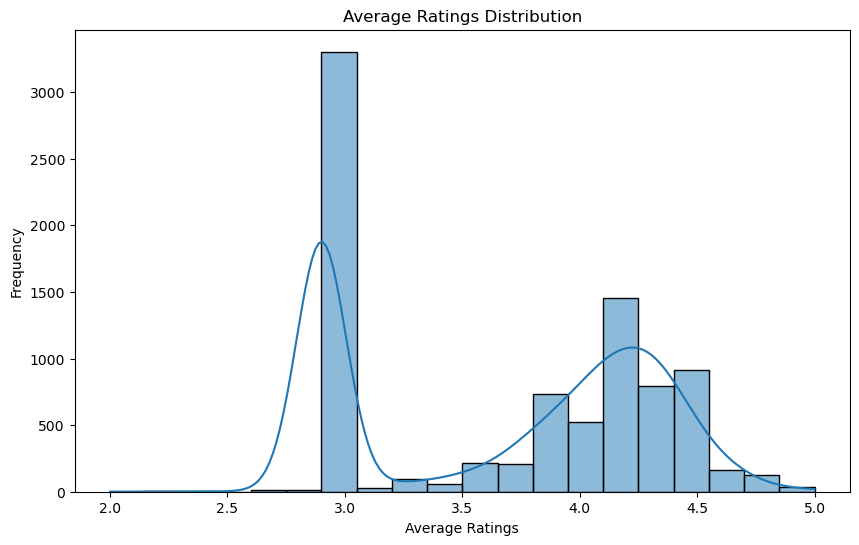

In [10]:
#Ratings Distribution

plt.figure(figsize=(10,6))
sns.histplot(df['Avg ratings'], bins=20, kde=True)
plt.title('Average Ratings Distribution')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#So many 3.0 ratings. Could this be a default rating? 
#does that make ratings less reliable/skewed down?
#no very low ratings. Customers only rate if they really like a place?

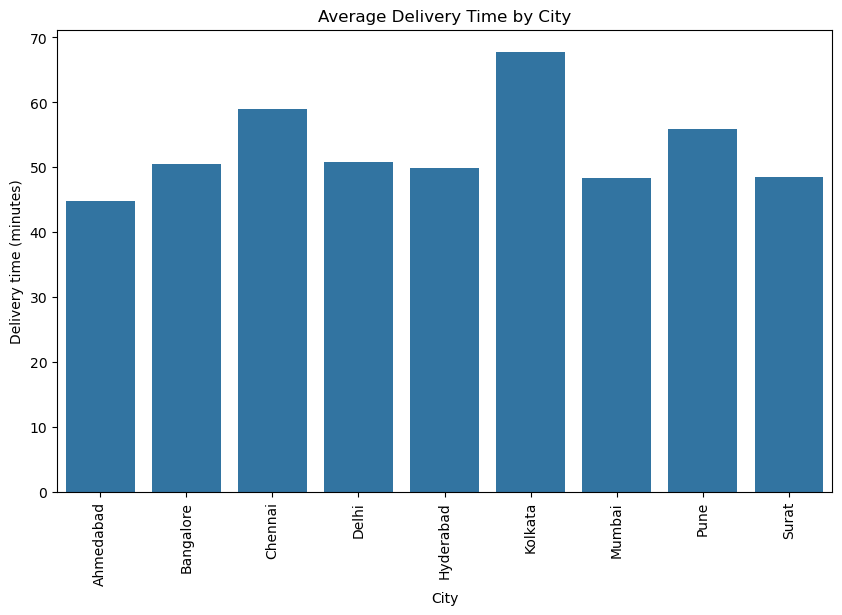

In [14]:
#Avg Delivery time by City
city_delivery_time = df.groupby('City')['Delivery time'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Delivery time', data=city_delivery_time, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Delivery Time by City')
plt.xlabel('City')
plt.ylabel('Delivery time (minutes)')
plt.show()
        

In [18]:

food_types_split = df['Food type'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
data_split = df.drop(columns=['Food type']).join(food_types_split.rename('Food type'))

city_food_rating = data_split.groupby(['City', 'Food type'])['Avg ratings'].mean().reset_index()

highest_rated_food_per_city = city_food_rating.loc[city_food_rating.groupby('City')['Avg ratings'].idxmax()]

print(highest_rated_food_per_city)


           City                       Food type  Avg ratings
28    Ahmedabad                 Ice Cream Cakes     4.600000
101   Bangalore                      Indonesian     4.600000
188     Chennai                      Indonesian     4.750000
274       Delhi                            Keto     4.600000
383   Hyderabad  Desserts  Ice Cream  Beverages     5.000000
568     Kolkata  Beverages  Ice Cream  Desserts     4.900000
827      Mumbai      Chinese  Indian  Beverages     4.900000
1122       Pune                            Keto     4.533333
1190      Surat                        Lucknowi     4.400000


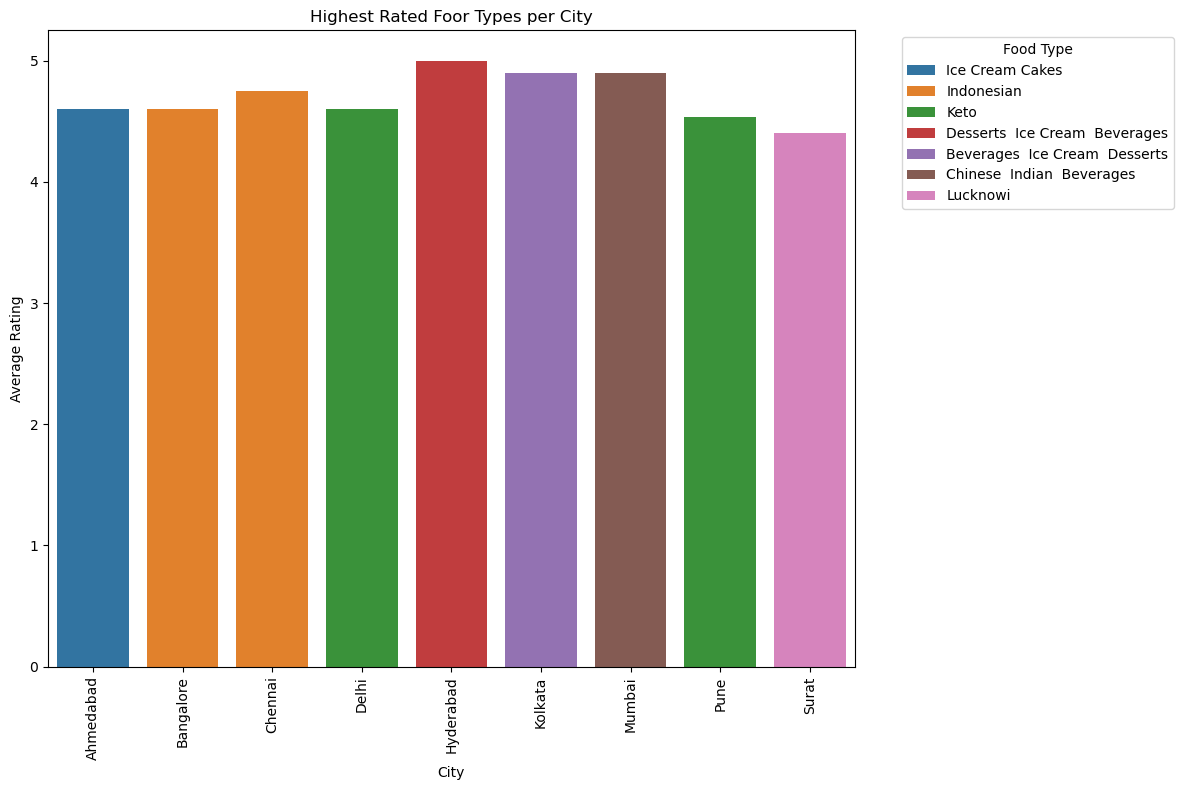

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Avg ratings', hue='Food type', data=highest_rated_food_per_city, dodge=False)
plt.title('Highest Rated Foor Types per City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend(title='Food Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()